# Prerequisite for using thundersvm

CUDA 버전을 9.0으로 맞춰 줍니다.

In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1

--2019-10-21 07:33:20--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?WuK_dl43SbsS02ZRMO6cocEMbYLVmXNFub-9sGotUEBepXi-H8t-MJ_NsNP7DuB3-yVK36xu2brPKoGNG5jGEYgODydDdGQwIBZWHBVTauMDO7KhUKn9wNUhd7Gpu1NwmH3qqQp9eOIEa2JNu8LeMlLWuYR5pR7e8oTWwY2qeK6jLLpaMzk-KvUEBH035xx_jf_EnvpSxwFNT0HyG_ye [following]
--2019-10-21 07:33:20--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?WuK_dl43SbsS02ZRMO6cocEMbYLVmXNFub-9sGotUEBepXi-H8t-MJ_NsNP7DuB3-yVK36xu2brPKoGNG5jGEYgODydDdGQwIBZWHBVTauMDO7

# Confirm that CUDA version is 9.0

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


# Install thundersvm module

In [0]:
!pip3 install thundersvm

     |████████████████████████████████| 501kB 2.8MB/s 


# Installation for comparison / visualization

In [0]:
!pip3 install numpy matplotlib scikit-learn

# Data preparation

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300000, centers=2,
                  random_state=0, cluster_std=0.60)

# Visualization function

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Performance of SVM in Scikit-learn

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


elapsed: 15.816747903823853


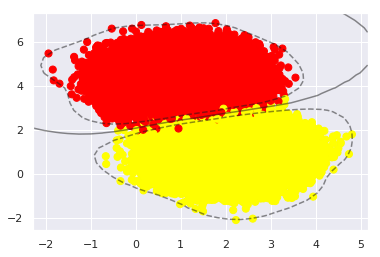

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
from time import time
start_time = time()
model = SVC()
model.fit(X, y)
print("elapsed: {}".format(time() - start_time))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# Performance of SVM in thundersvm

elapsed: 1.4504098892211914


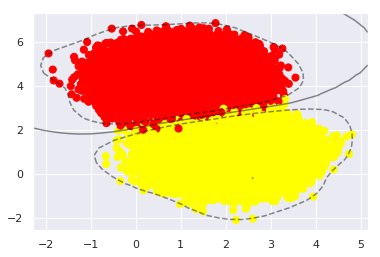

In [0]:
from thundersvm import SVC
from time import time
start_time = time()
model = SVC()
model.fit(X, y)
print("elapsed: {}".format(time() - start_time))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
